## 결측치 확인(missing values)

In [1]:
import pandas as pd
covidtotals = pd.read_csv("data/covidtotalswithmissings.csv")

In [2]:
covidtotals.head()

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


- Missing Values 확인

In [3]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iso_code         210 non-null    object 
 1   lastdate         210 non-null    object 
 2   location         210 non-null    object 
 3   total_cases      210 non-null    int64  
 4   total_deaths     210 non-null    int64  
 5   total_cases_pm   209 non-null    float64
 6   total_deaths_pm  209 non-null    float64
 7   population       210 non-null    float64
 8   pop_density      198 non-null    float64
 9   median_age       186 non-null    float64
 10  gdp_per_capita   182 non-null    float64
 11  hosp_beds        164 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 19.8+ KB


- 리스트 작성
    - 인구통계 관련 column
    - Covid 관련 column

In [4]:
case_vars = ["location", "total_cases", "total_deaths", "total_cases_pm", "total_deaths_pm"]
demo_vars = ["population", "pop_density", "median_age", "gdp_per_capita", "hosp_beds"]

In [5]:
covidtotals[demo_vars].isnull().sum(axis = 0) # column별로 결측치 측정

population         0
pop_density       12
median_age        24
gdp_per_capita    28
hosp_beds         46
dtype: int64

In [6]:
covidtotals[case_vars].isnull().sum(axis = 0)

location           0
total_cases        0
total_deaths       0
total_cases_pm     1
total_deaths_pm    1
dtype: int64

- 행 방향으로 발생한 결측치 확인

In [7]:
demovars_misscnt = covidtotals[demo_vars].isnull().sum(axis = 1)
demovars_misscnt

0      0
1      0
2      0
3      3
4      1
      ..
205    0
206    3
207    0
208    0
209    0
Length: 210, dtype: int64

In [8]:
demovars_misscnt.value_counts()

0    156
1     24
2     12
3     10
4      8
dtype: int64

In [9]:
covidtotals[case_vars].isnull().sum(axis = 1).value_counts()

0    209
2      1
dtype: int64

- 인구통계 데이터가 3가지 이상 누락된 국가를 나열

In [10]:
covidtotals.loc[demovars_misscnt >= 3, ["location"] + demo_vars].head(5)

,location,population,pop_density,median_age,gdp_per_capita,hosp_beds
3,Andorra,77265.0,163.755,NaN,NaN,NaN
5,Anguilla,15002.0,NaN,NaN,NaN,NaN
24,Bonaire Sint Eustatius and Saba,26221.0,NaN,NaN,NaN,NaN
28,British Virgin Islands,30237.0,207.973,NaN,NaN,NaN
64,Faeroe Islands,48865.0,35.308,NaN,NaN,NaN


In [11]:
covidtotals.loc[demovars_misscnt >= 3, ["location"] + demo_vars].T # T: 행과 열을 바꿔줌

,3,5,24,28,64,65,75,77,81,95,100,104,130,142,185,194,203,206
location,Andorra,Anguilla,Bonaire Sint Eustatius and Saba,British Virgin Islands,Faeroe Islands,Falkland Islands,Gibraltar,Greenland,Guernsey,Isle of Man,Jersey,Kosovo,Montserrat,Northern Mariana Islands,Taiwan,Turks and Caicos Islands,Vatican,Western Sahara
population,77265.0,15002.0,26221.0,30237.0,48865.0,3483.0,33691.0,56772.0,67052.0,85032.0,101073.0,1932774.0,4999.0,57557.0,23816775.0,38718.0,809.0,597330.0
pop_density,163.755,NaN,NaN,207.973,35.308,NaN,3457.1,0.137,NaN,147.872,NaN,NaN,NaN,119.878,NaN,37.312,NaN,NaN
median_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.2,NaN,NaN,28.4
gdp_per_capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hosp_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- case 관련 누락국가 확인

In [12]:
casevars_misscnt = covidtotals[case_vars].isnull().sum(axis = 1)
casevars_misscnt.value_counts()

0    209
2      1
dtype: int64

In [13]:
covidtotals.loc[casevars_misscnt >= 1, ["location"] + case_vars]

,location,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
87,Hong Kong,Hong Kong,0,0,NaN,NaN


In [14]:
covidtotals[covidtotals["location"] == "Hong Kong"]

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
87,HKG,2020-05-26,Hong Kong,0,0,NaN,NaN,7496988.0,7039.714,44.8,56054.92,NaN


In [15]:
temp = covidtotals.copy()
temp

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,VNM,2020-06-01,Vietnam,328,0,3.370,0.000,97338583.0,308.127,32.6,6171.884,2.60
206,ESH,2020-06-01,Western Sahara,23,1,38.505,1.674,597330.0,NaN,28.4,NaN,NaN
207,YEM,2020-06-01,Yemen,323,80,10.829,2.682,29825968.0,53.508,20.3,1479.147,0.70
208,ZMB,2020-06-01,Zambia,1057,7,57.496,0.381,18383956.0,22.995,17.7,3689.251,2.00


In [16]:
temp.total_cases_pm.fillna(temp.total_cases / (temp.population/10000000), inplace = True)
temp.total_deaths_pm.fillna(temp.total_cases / (temp.population/10000000), inplace = True)

In [17]:
temp[case_vars].isnull().sum(axis = 0)

location           0
total_cases        0
total_deaths       0
total_cases_pm     0
total_deaths_pm    0
dtype: int64

## 이상치 판별(outlier_detction)

- statsmodels: https://www.statsmodels.org/stable/install.html
- scipy: https://anaconda.org/anaconda/scipy or https://scipy.org/install/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scistat

covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace = True)

case_vars = ["location", "total_cases", "total_deaths", "total_cases_pm", "total_deaths_pm"]
demo_vars = ["population", "pop_density", "median_age", "gdp_per_capita", "hosp_beds"]

print(covidtotals.head())

            lastdate     location  total_cases  total_deaths  total_cases_pm  \
iso_code                                                                       
AFG       2020-06-01  Afghanistan        15205           257         390.589   
ALB       2020-06-01      Albania         1137            33         395.093   
DZA       2020-06-01      Algeria         9394           653         214.225   
AND       2020-06-01      Andorra          764            51        9888.048   
AGO       2020-06-01       Angola           86             4           2.617   

          total_deaths_pm  population  pop_density  median_age  \
iso_code                                                         
AFG                 6.602  38928341.0       54.422        18.6   
ALB                11.467   2877800.0      104.871        38.0   
DZA                14.891  43851043.0       17.348        29.1   
AND               660.066     77265.0      163.755         NaN   
AGO                 0.122  32866268.0      

- 상황에 따라 주관적으로 판별할 수 있음
- 통계에서의 이상값은
    + 정규분포를 이루고 있지 않을 경우 -> 이상값이 존재할 것
    + 왜도 또는 첨도가 발생할 경우 존재
- 균등분포(Unlform Distribution)
    +이상값이 존재하지 않음

### 변수 1개만 활용해서 이상값 찾기

In [2]:
covid_case_df = covidtotals.loc[:,case_vars]
covid_case_df.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,210.000000,210.000000
mean,2.921614e+04,1770.714286,1355.357943,55.659129
std,1.363978e+05,8705.565857,2625.277497,144.785816
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.757500e+02,4.000000,92.541500,0.884750
50%,1.242500e+03,25.500000,280.928500,6.154000
75%,1.011700e+04,241.250000,1801.394750,31.777250
max,1.790191e+06,104383.000000,19771.348000,1237.551000


백분위수(quantile)로 데이터를 표시

In [3]:
covid_case_df.quantile(np.arange(0.0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.0000,0.0000
0.1,22.9,0.0,17.9986,0.0000
0.2,105.2,2.0,56.2910,0.3752
0.3,302.0,6.7,115.4341,1.7183
0.4,762.0,12.0,213.9734,3.9566
0.5,1242.5,25.5,280.9285,6.1540
0.6,2514.6,54.6,543.9562,12.2452
0.7,6959.8,137.2,1071.2442,25.9459
0.8,16847.2,323.2,2206.2982,49.9658
0.9,46513.1,1616.9,3765.1363,138.9045


- 왜도 & 첨도 구하기
- pandas에 관련 함수 존재

In [4]:
covid_case_df.skew(axis = 0)

total_cases        10.804275
total_deaths        8.929816
total_cases_pm      4.396091
total_deaths_pm     4.674417
dtype: float64

In [6]:
covid_case_df.kurtosis(axis = 0)

total_cases        134.979577
total_deaths        95.737841
total_cases_pm      25.242790
total_deaths_pm     27.238232
dtype: float64

- 정규성 검정 테스트
- [샤피로 윌크 검정]
    + 귀무가설: 표본의 모집단이 정규분포를 이루고 있다.
    + 대립가설: 표본의 모집단이 정규분포를 이루고 있지 않다.
    만약, p.value < 0.05 일 경우 대립가설을 채택

In [8]:
scistat.shapiro(covid_case_df['total_cases'])

ShapiroResult(statistic=0.19379639625549316, pvalue=3.753789128593843e-29)

In [9]:
scistat.shapiro(covid_case_df['total_deaths'])

ShapiroResult(statistic=0.19832086563110352, pvalue=4.3427896631016077e-29)

In [10]:
scistat.shapiro(covid_case_df['total_cases_pm'])

ShapiroResult(statistic=0.5220695734024048, pvalue=1.3972683006509067e-23)

In [11]:
scistat.shapiro(covid_case_df['total_deaths_pm'])

ShapiroResult(statistic=0.41877639293670654, pvalue=1.361060423265974e-25)

- qqplot

Text(0.5, 1.0, 'QQ Plot of Total Cases')

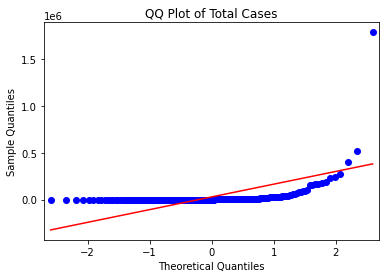

In [15]:
sm.qqplot(covid_case_df[['total_cases']].sort_values(["total_cases"]), line='s')
plt.title("QQ Plot of Total Cases")

- 정규분포를 이루는 샘플 데이터 생성, 샹피로 윌크 테스 검정, qqplot 그래프

In [16]:
random_normal_datapoints = pd.Series(np.random.normal(0,0.1,200))
scistat.shapiro(random_normal_datapoints)

ShapiroResult(statistic=0.9947549104690552, pvalue=0.7137323617935181)

Text(0.5, 1.0, 'QQ Plot of Normal Datapoints')

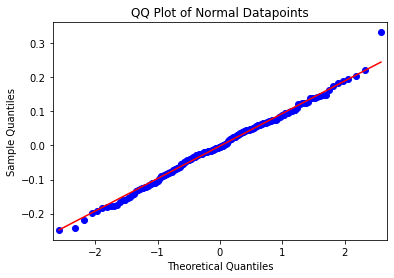

In [17]:
sm.qqplot(random_normal_datapoints, line ="s")
plt.title("QQ Plot of Normal Datapoints")

### 이상값 범위 나타내기
- 이상값 범위를 정의
- 통계적으로, 이상값 범위는 1사분위(25%), 3사분위(75%) 사이의 거리가 1.5배를 넘으면 이상값으로 간주

In [20]:
thirdq = covid_case_df["total_cases"].quantile(0.75)
firstq = covid_case_df["total_cases"].quantile(0.25)

interquantile_range = 1.5 * (thirdq-firstq)
outlier_high = interquantile_range + thirdq
outlier_low = firstq - interquantile_range

print(outlier_low, outlier_high, sep = " <-----> ")

-14736.125 <-----> 25028.875


- 이상치를 제거한 데이터 가져오기

In [27]:
remove_outlier_df = covid_case_df.loc[-(covid_case_df["total_cases"] > outlier_high) | (covid_case_df["total_cases"] < outlier_low)]
remove_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, AFG to ZWE
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         177 non-null    object 
 1   total_cases      177 non-null    int64  
 2   total_deaths     177 non-null    int64  
 3   total_cases_pm   177 non-null    float64
 4   total_deaths_pm  177 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.3+ KB


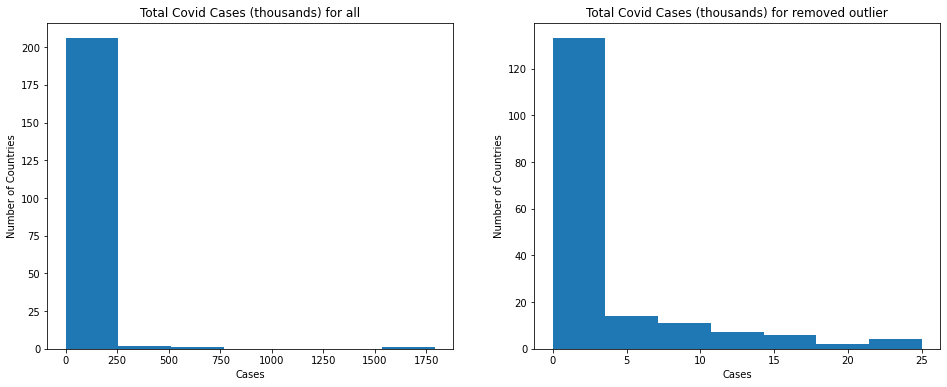

In [28]:
fig, ax = plt.subplots(figsize = (16, 6), ncols = 2)
ax[0].hist(covid_case_df["total_cases"]/1000, bins = 7)
ax[0].set_title("Total Covid Cases (thousands) for all")
ax[0].set_xlabel("Cases")
ax[0].set_ylabel("Number of Countries")
ax[1].hist(remove_outlier_df["total_cases"]/1000, bins = 7)
ax[1].set_title("Total Covid Cases (thousands) for removed outlier")
ax[1].set_xlabel("Cases")
ax[1].set_ylabel("Number of Countries")
plt.show()